<h1 align="center">KRX Big-Data</h1>

# [ 1 ] Overview

### 1. Sources

 - `[유가증권]일별 시세정보(주문번호-1300-27)` : 2020년 1분기 주식 정보 -> _CSV 형식_
 - `[유가증권]일별 시세정보(주문번호-1300-30)` : 2021년 1분기 주식 정보 -> _CSV 형식_
 - `[유가증권]일별 시세정보(주문번호-1300-33)` : 2022년 1분기 주식 정보 -> _CSV 형식_

<br><br><br>

### 2. Targets from `.CSV` files (Input)

| 항목 명 | 항목 영어명 |
|:---:|:---:|
|`거래일자`|TRD_DD|
|`종목코드`|ISU_CD|
|`종목명`|ISU_NM|
|`시가`|OPNPRC|
|`고가`|HGPRC|
|`저가`|LWPRC|
|`종가`|CLSPRC|
|(누적)`거래량`|ACC_TRDVOL|
|`업종구분`(지수업종코드)|IDX_IND_CD|
|`PER`(주가수익률)|PER|
|`상장일`|LIST_DD|
|`시가총액`|MKTCAP|

<br><br><br>

### 3. Results (Output)

| Property | Description |
|:---:|:---:|
|TRD_DD|`거래일자`|
|ISU_CD|`종목코드`|
|ISU_NM|`종목명`|
|OPNPRC|`시가`|
|HGPRC|`고가`|
|LWPRC|`저가`|
|CLSPRC|`종가`|
|ACC_TRDVOL|(누적)`거래량`|
|IDX_IND_CD|`업종구분`(지수업종코드)|
|PER|`PER`(주가수익률)|
|LIST_DD|`상장일`|
|MKTCAP|`시가총액`|

<br><br><br><hr>

# [ 2 ] Importing Modules

In [13]:
# Data Handlers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Code Libraries
import os
import copy
import abc
import datetime

<br><br><br>

# [ 3 ] Declarations

In [43]:
import copy

############################################################################################################

class Utils:
    """
    데이터 처리를 위해 유용한 기능들을 정의한 클래스입니다.
    """
    @staticmethod
    def generate_int_range(start:int, end:int)->iter:
        """
        start와 end 사이의 정수들을 반환하는 Generator입니다.
        """
        if(start >= end):
            raise SyntaxError(f"{start} must be larger than {end}")
        while start <= end:
            yield start
            start += 1
            
    """
    깊은 복사를 한 인스턴스를 반환합니다.
    """
    @staticmethod
    def clone(target:object)->object:
        return copy.deepcopy(target)
    
            
############################################################################################################

import pandas

class PandasBasedCSVHandler:
    """
    Pandas 모듈을 기반으로 CSV 파일 데이터를 다루는 클래스입니다.
    """
    def __init__(self, handler:pandas)->None:
        self.__handler = handler
        self.__data = dict()
        
    @property
    def handler(self)->pandas:
        """
        주입받은 Pandas 객체를 반환합니다.
        이미 생성된 handler 인스턴스는 대체될 수 없고 반환만 가능합니다.
        """
        return self.__handler
    
    def take_data_from_CSV_file(self, *, data_id:object, filepath:str, encoding:str="utf-8")->object:
        """
        불러올 CSV 파일의 경로를 받아 데이터를 가져오고
        데이터를 식별할 data_id를 받습니다.
        Argument를 반드시 키워드로 명시하여 Parameter에 전달해야 합니다.
        """
        self.__data[data_id] = self.__handler.read_csv(filepath, encoding=encoding)
        return self
    
    def get_CSV_data(self)->dict:
        """
        다음 Dictionary 자료구조를 반환합니다.
        key의 타입(자료형)은 정수형으로 의도되었지만 어떤 타입이 들어올지는 자유입니다.
        value는 Pandas 타입의 객체입니다.
        """
        return self.__data
    
    def validate(self, target_properties:list)->object:
        """
        모든 Pandas 데이터가 target_properties에 명시된 속성을 가지고 있는지 확인합니다.
        만일, 속성이 매칭되지 않으면 예외가 발생할 것입니다.
        모든 과정이 성공하면 True를 반환합니다.
        """
        for data_key, _ in self.__data.items():
            self.__data[data_key][target_properties]
        return True

############################################################################################################

class KRXStockData:
    """
    """
    
    @staticmethod
    def pick_properties(self, ins_ref:pandas)->pandas:
        """
        """
        pass
    
    @staticmethod
    def make_non_exists_PER_zero(self, ins_ref:pandas)->pandas:
        """
        
        """
        pass
        
        

############################################################################################################

class DataVisualization:
    """
    데이터 시각화를 위한 클래스 입니다.
    """
    def draw_lineplot(x): # x 파라미터에 대한 시계열 lineplot 그리기          
        
        fig = plt.figure(figsize=(20,25))
        i=0

        for date_num in Utils.generate_int_range(csv_file_info["date_range"][0], csv_file_info["date_range"][1]): 
            ax = plt.subplot(4,2,i+1)
            ax.plot(processed_data[date_num]['거래일자'], processed_data[date_num][x])
            ax.set_xlabel(str(x))
            ax.set_ylabel(str(['거래일자']))
            i=i+1
        fig.tight_layout()

############################################################################################################

<br><br><br>

# [ 4 ] Stock Predictions

## 01. 데이터 수집 및 전처리 단계

### (1) 데이터 경로 및 이름 설정

In [15]:
# CSV 파일 루트 경로
root_dir:str = os.path.join("..", "data")

# CSV 파일 전체 경로 및 이름 형식
filepath_form:str = os.path.join(root_dir, "{0}","{0}_{1}.csv")

# 각 CSV 파일들을 가져오기 위한 프로파일 list<dict[]>
csv_file_profiles : list = [
    {
        "name" : "[유가증권]일별 시세정보(주문번호-1300-27)",
        "date_range" : [202001, 202003]
    },
    {
        "name" : "[유가증권]일별 시세정보(주문번호-1300-30)",
        "date_range" : [202101, 202103]
    },
    {
        "name" : "[유가증권]일별 시세정보(주문번호-1300-33)",
        "date_range" : [202201, 202203]
    }
]

# "종목코드"를 기준으로 각 CSV 데이터들을 식별하는 용도의 자료구조
index_properties:list = dict()

# 데이터 전처리에 필요한 속성들
selected_properties = ["거래일자","종목코드","종목명", "시가", "고가", "저가", "종가", "거래량", "업종구분", "PER", "상장일", "시가총액"]

### (2) CSV 파일 데이터 불러오기

In [16]:
# class<PandasBasedCSVHandler> 인스턴스 생성
csv_handler:PandasBasedCSVHandler = PandasBasedCSVHandler(pd)

In [17]:
# CSV 프로파일 기반으로 class<PandasBasedCSVHandler> 인스턴스에 데이터 병합
for csv_file_info in csv_file_profiles: # 프로파일 요소 기반 iteration 작업
    for date_num in Utils.generate_int_range(csv_file_info["date_range"][0], csv_file_info["date_range"][1]): # Iterator 생성
        csv_handler.take_data_from_CSV_file(
            data_id = date_num, # Year + Month 형식의 정수
            filepath = filepath_form.format(csv_file_info["name"], date_num), # 폴더를 포함한 전체 경로의 파일명
            encoding="cp949" # 파일 인코딩 명시
        )

### (3) 데이터 속성 검증하기

In [18]:
# 검증할 속성 내용들은 [1. 데이터 경로 및 이름 설정]의 selected_properties 변수 참고
csv_handler.validate(selected_properties)

True

#### - 핸들러(Hander)에 저장된 CSV 데이터 형식

```js
{
    202001 : Pandas,
    202002 : Pandas,
    202003 : Pandas,
    202101 : Pandas,
    202102 : Pandas,
    202103 : Pandas,
    202201 : Pandas,
    202202 : Pandas,
    202203 : Pandas
}
```

### (4) 데이터 획득 및 전처리

In [19]:
processed_data = csv_handler.get_CSV_data()

In [20]:
for csv_file_info in csv_file_profiles: # 프로파일 요소 기반 iteration 작업
    for date_num in Utils.generate_int_range(csv_file_info["date_range"][0], csv_file_info["date_range"][1]): # Iterator 생성
        processed_data[date_num] = processed_data[date_num][selected_properties].replace("-", 0)
        processed_data[date_num]["거래일자"] = pd.to_datetime(processed_data[date_num]["거래일자"].astype('str'))
        index_properties[date_num] = processed_data[date_num].drop_duplicates(["종목코드", "종목명"])["종목명"].to_numpy()

In [21]:
processed_data

{202001:             거래일자          종목코드          종목명    시가    고가    저가    종가     거래량  \
 0     2020-01-02  KR7000020008      동화약품보통주  8340  8400  8290  8400  111305   
 1     2020-01-03  KR7000020008      동화약품보통주  8400  8450  8290  8360   96437   
 2     2020-01-06  KR7000020008      동화약품보통주  8290  8330  8120  8180   73230   
 3     2020-01-07  KR7000020008      동화약품보통주  8200  8280  8090  8160  117904   
 4     2020-01-08  KR7000020008      동화약품보통주  8170  8170  7830  7930  263246   
 ...          ...           ...          ...   ...   ...   ...   ...     ...   
 18322 2020-01-23  KYG5307W1015  엘브이엠씨홀딩스보통주  4220  4325  4200  4290  178258   
 18323 2020-01-28  KYG5307W1015  엘브이엠씨홀딩스보통주  4050  4200  3740  4095  348080   
 18324 2020-01-29  KYG5307W1015  엘브이엠씨홀딩스보통주  4095  4180  4095  4105  104726   
 18325 2020-01-30  KYG5307W1015  엘브이엠씨홀딩스보통주  4100  4145  3985  4050  145074   
 18326 2020-01-31  KYG5307W1015  엘브이엠씨홀딩스보통주  4000  4250  4000  4085  193650   
 
           업종구분    PER       상

C:\Users\jiyou\AppData\Local\Temp\ipykernel_6796\274905822.py:11: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.tight_layout()
C:\Users\jiyou\AppData\Local\Temp\ipykernel_6796\274905822.py:11: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.tight_layout()
C:\Users\jiyou\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jiyou\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


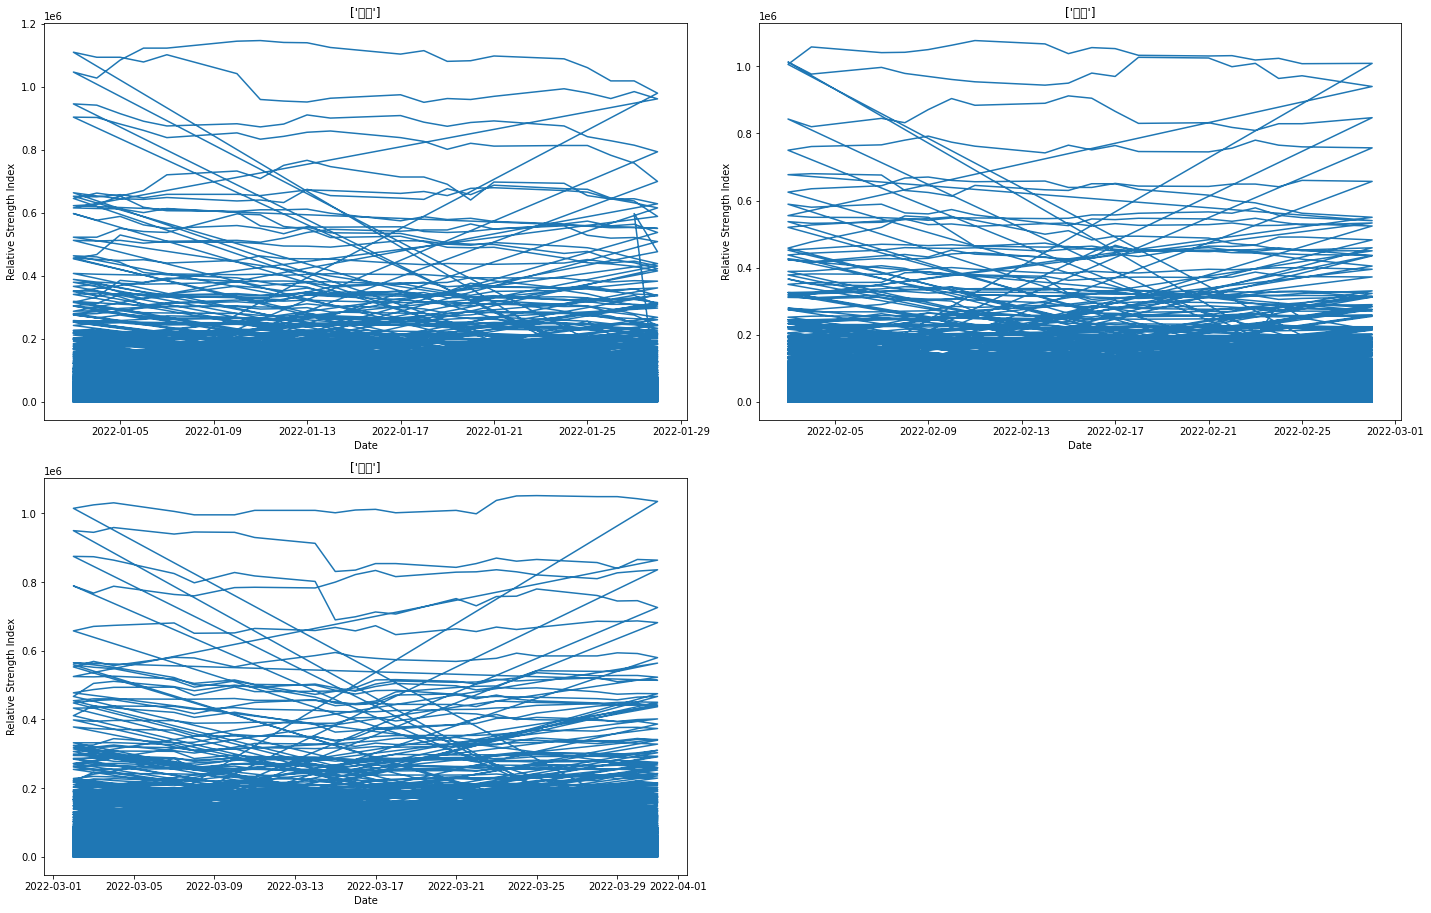

In [38]:
fig = plt.figure(figsize=(20,25))
i=0

for date_num in Utils.generate_int_range(csv_file_info["date_range"][0], csv_file_info["date_range"][1]): # Iterator 생성
    ax = plt.subplot(4,2,i+1)
    ax.plot(processed_data[date_num]['거래일자'], processed_data[date_num]['시가'])
    ax.set_title(str(['시가']))
    ax.set_xlabel("Date")
    ax.set_ylabel("Relative Strength Index")
    i=i+1
fig.tight_layout()
